In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.lines as mlines

In [2]:
df = pd.read_csv("./time-eval/results/time-eval-results.csv", sep=';')

file_abbreviations = {
    "{'filePath': './time-eval/logs/ocel1/', 'fileName': 'p2p', 'extension': '.jsonocel', 'ocelVersion': 1}": 'P2P',
    "{'filePath': './time-eval/logs/ocel1/', 'fileName': 'github_pm4py', 'extension': '.jsonocel', 'ocelVersion': 1}": 'Github PM4Py',
    "{'filePath': './time-eval/logs/', 'fileName': 'ContainerLogistics', 'extension': '.sqlite', 'ocelVersion': 2}": 'Container Logistics',
    "{'filePath': './time-eval/logs/ocel1/', 'fileName': 'o2c', 'extension': '.jsonocel', 'ocelVersion': 1}": 'O2C',
    "{'filePath': './time-eval/logs/ocel1/', 'fileName': 'recruiting', 'extension': '.jsonocel', 'ocelVersion': 1}": 'Recruiting',
    "{'filePath': './time-eval/logs/ocel1/', 'fileName': 'transfer_order', 'extension': '.jsonocel', 'ocelVersion': 1}": 'Transfer',
    "{'filePath': './time-eval/logs/', 'fileName': 'order-management', 'extension': '.sqlite', 'ocelVersion': 2}": 'Order Management',
    "{'filePath': './time-eval/logs/ocel1/', 'fileName': 'windows_events', 'extension': '.jsonocel', 'ocelVersion': 1}": 'Windows',
    "{'filePath': './time-eval/logs/ocel1/', 'fileName': 'p2p-normal', 'extension': '.jsonocel', 'ocelVersion': 1}": 'P2P-normal',
    "{'filePath': './time-eval/logs/', 'fileName': 'angular_github_commits_ocel', 'extension': '.xml', 'ocelVersion': 2}": 'Angular'
}
df['file'] = df['file'].map(file_abbreviations).fillna(df['file'])

print(df.head())

  file             save-filename  number_objects  number_events  number_px  \
0  P2P  2025-02-16-14-25-43.json           74489          24854      12538   
1  P2P  2025-02-16-14-25-50.json           74489          24854      12538   
2  P2P  2025-02-16-14-25-57.json           74489          24854      12538   
3  P2P  2025-02-16-14-26-05.json           74489          24854      12538   
4  P2P  2025-02-16-14-26-12.json           74489          24854      12538   

   length_O2O  time_overall  time_totem  time_ilp  time_ilpsolve   time_cc  
0          17      7.302627    7.263355  0.001035       0.038237  0.000000  
1          17      6.992312    6.968686  0.001005       0.022621  0.000000  
2          17      7.332201    7.308346  0.000000       0.023855  0.000000  
3          17      7.410117    7.385661  0.001021       0.022417  0.001018  
4          17      7.023374    6.999974  0.000000       0.023400  0.000000  


In [3]:
df.drop('save-filename', axis=1, inplace=True)

In [4]:
df

,file,number_objects,number_events,number_px,length_O2O,time_overall,time_totem,time_ilp,time_ilpsolve,time_cc
0,P2P,74489,24854,12538,17,7.302627,7.263355,0.001035,0.038237,0.000000
1,P2P,74489,24854,12538,17,6.992312,6.968686,0.001005,0.022621,0.000000
2,P2P,74489,24854,12538,17,7.332201,7.308346,0.000000,0.023855,0.000000
3,P2P,74489,24854,12538,17,7.410117,7.385661,0.001021,0.022417,0.001018
4,P2P,74489,24854,12538,17,7.023374,6.999974,0.000000,0.023400,0.000000
...,...,...,...,...,...,...,...,...,...,...
95,Angular,28317,27842,1,1,167.644199,167.620415,0.000000,0.023784,0.000000
96,Angular,28317,27842,1,1,167.558950,167.535967,0.000000,0.022983,0.000000
97,Angular,28317,27842,1,1,168.258811,168.236219,0.000000,0.022592,0.000000
98,Angular,28317,27842,1,1,167.254044,167.231749,0.000000,0.022295,0.000000


In [5]:
# Compute the total sum of the 'time_overall' and 'time_totem' columns
total_time_overall = df['time_overall'].sum()
total_time_totem = df['time_totem'].sum()

# Display the results
print("Total Time Overall:", total_time_overall)
print("Total Time Totem:", total_time_totem)

df = df[df['file'] != 'Angular']

print("Maximum Time Overall:", df['time_overall'].max())

Total Time Overall: 2218.535548
Total Time Totem: 2215.761724
Maximum Time Overall: 23.341669


In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)

file


In [7]:
df['time_totem']

0     7.263355
1     6.968686
2     7.308346
3     7.385661
4     6.999974
        ...   
85    0.110364
86    0.110391
87    0.109758
88    0.111692
89    0.111780
Name: time_totem, Length: 90, dtype: float64

In [8]:
df_grouped = df.groupby('file').mean()
df_grouped.reset_index(inplace=True)
df_grouped = df_grouped[df_grouped['file'] != 'Angular']
print(df_grouped)

                  file  number_objects  number_events  number_px  length_O2O  \
0  Container Logistics         13882.0        35372.0       13.0         9.0   
1         Github PM4Py           532.0         1798.0        1.0         3.0   
2                  O2C        107767.0        98350.0    28503.0        55.0   
3     Order Management         10840.0        21008.0        1.0        13.0   
4                  P2P         74489.0        24854.0    12538.0        17.0   
5           P2P-normal           781.0          720.0       80.0         7.0   
6           Recruiting          1505.0         6980.0        1.0        15.0   
7             Transfer          2500.0        10319.0        5.0        10.0   
8              Windows           404.0        98128.0        1.0        15.0   

   time_overall  time_totem  time_ilp  time_ilpsolve   time_cc  
0      3.948712    3.920631  0.000606       0.027372  0.000103  
1      0.178508    0.155723  0.000203       0.022479  0.000102  
2   

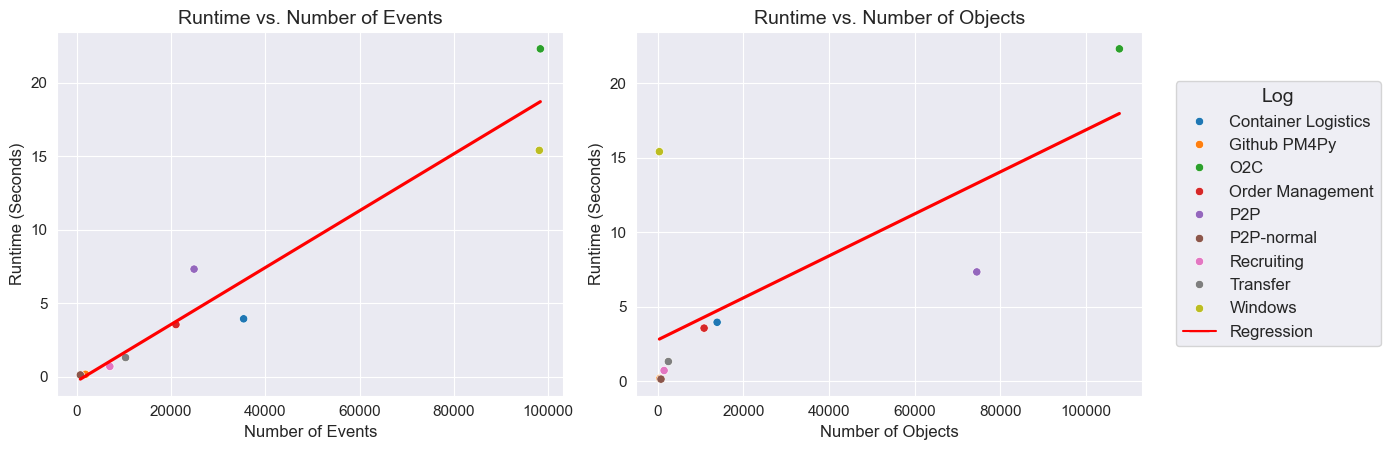

In [9]:
plt.rcParams['axes.labelsize'] = 12  # Sets the font size for the x and y labels
plt.rcParams['axes.titlesize'] = 14  # Sets the font size for the titles
plt.rcParams['legend.fontsize'] = 12  # Sets the font size for the legend
plt.rcParams['xtick.labelsize'] = 11  # Sets the font size for the x tick labels
plt.rcParams['ytick.labelsize'] = 11  # Sets the font size for the y tick labels

# Creating the plots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Overall Time vs. Number of Events
sns.scatterplot(data=df_grouped, x='number_events', y='time_overall', hue='file', ax=ax[0], legend=None)
sns.regplot(data=df_grouped, x='number_events', y='time_overall', scatter=False, ax=ax[0], color='red', ci=None)
ax[0].set_title('Runtime vs. Number of Events')
ax[0].set_xlabel('Number of Events')
ax[0].set_ylabel('Runtime (Seconds)')

# Plot 2: Overall Time vs. Number of Objects
sns.scatterplot(data=df_grouped, x='number_objects', y='time_overall', hue='file', ax=ax[1])
sns.regplot(data=df_grouped, x='number_objects', y='time_overall', scatter=False, ax=ax[1], color='red', ci=None)
ax[1].set_title('Runtime vs. Number of Objects')
ax[1].set_xlabel('Number of Objects')
ax[1].set_ylabel('Runtime (Seconds)')

# Adjust legend
handles, labels = ax[1].get_legend_handles_labels()
regression_handle = mlines.Line2D([], [], color='red', marker='_', markersize=15, label='Regression')
# Add it to the existing handles
handles.append(regression_handle)
legend = ax[1].legend(handles=handles, loc='center left', bbox_to_anchor=(1.05, 0.5), title='Log', title_fontsize=14)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('time-eval-plot.pdf', format='pdf', bbox_inches='tight')
plt.show()